In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

# A quick test of turning time series into images using the GramianAngularField Method

In [2]:
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)
gasf = GramianAngularField(image_size=24, method='summation')

print(X_train)
print(y_train)

X_gasf = gasf.fit_transform(X_train)
gadf = GramianAngularField(image_size=24, method='difference')
X_gadf = gadf.fit_transform(X_train)

[[-0.6478854  -0.64199155 -0.63818632 ... -0.64042873 -0.63866571
  -0.63865722]
 [-0.64442658 -0.64540093 -0.64705511 ... -0.6349345  -0.6344968
  -0.63159565]
 [-0.77835282 -0.77827907 -0.77715084 ... -0.70419626 -0.70760524
  -0.7071202 ]
 ...
 [-0.77912617 -0.77837863 -0.7757449  ... -0.50500603 -0.50373099
  -0.50438486]
 [-0.70303339 -0.70261754 -0.70250356 ... -0.64113375 -0.64140622
  -0.64210896]
 [-1.4357199  -1.4322717  -1.4329285  ... -1.4354619  -1.4352821
  -1.4308845 ]]
[2 2 1 1 2 2 2 2 2 1 1 1 1 1 2 1 2 2 1 2 1 1 1 2 1 2 1 1 2 1 1 2 2 1 2 1 2
 2 2 2 2 1 1 1 2 2 1 2 1 2]


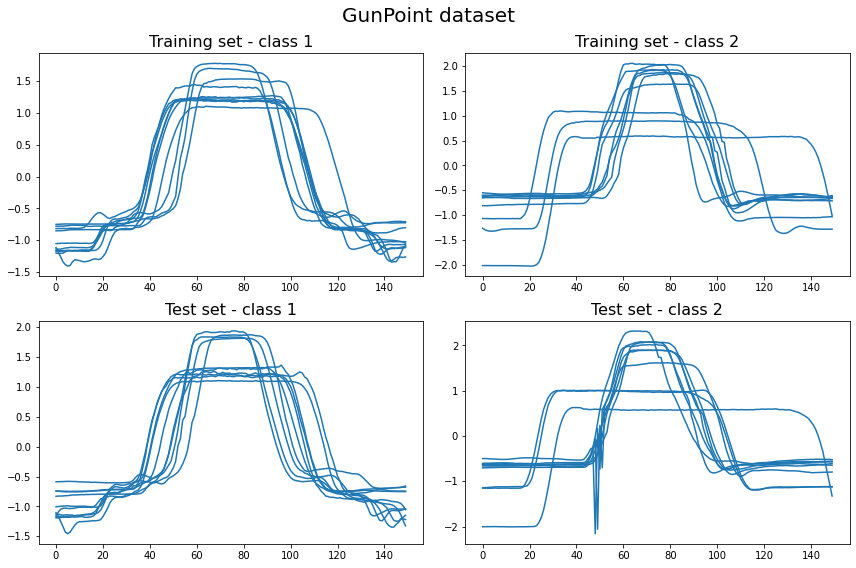

In [3]:
n_samples_per_plot = 10

plt.figure(figsize=(12, 8))

for i, (X, y, set_, class_,) in enumerate(zip(
    [X_train, X_train, X_test, X_test],
    [y_train, y_train, y_test, y_test],
    ['Training', 'Training', 'Test', 'Test'],
    [1, 2, 1, 2]
)):
    plt.subplot(2, 2, i + 1)
    for j in range(n_samples_per_plot):
        plt.plot(X[y == class_][j], 'C0')
    plt.title('{} set - class {}'.format(set_, class_), fontsize=16)

plt.suptitle('GunPoint dataset', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.2)
plt.show()

In [5]:

# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
images = [X_gasf[0], X_gadf[0]]
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, len(images)),
                 axes_pad=0.15,
                 share_all=True,
                 )

titles = ['Summation', 'Difference', 'Y Summation', 'Y Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'cbar_location'